In [3]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import pandas as pd



Bad key "text.kerning_factor" on line 4 in
/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
df = pd.read_csv("Data/istanbul_deaths_2008_2020.csv")
df.head()

,Date,Number
0,01/01/2008,129
1,02/01/2008,152
2,03/01/2008,120
3,04/01/2008,157
4,05/01/2008,128


In [5]:
df["Date"]=pd.to_datetime(df['Date'].astype(str), format='%d/%m/%Y')

In [6]:
df.dtypes

Date      datetime64[ns]
Number             int64
dtype: object

In [26]:
df

,Number
Date,
2008-01-01,129
2008-01-02,152
2008-01-03,120
2008-01-04,157
2008-01-05,128
...,...
2020-04-15,300
2020-04-16,288
2020-04-17,278


In [8]:

df = df.set_index('Date')
#df.drop(['Date'], axis=1, inplace=True)



In [27]:
df.head()

,Number
Date,
2008-01-01,129
2008-01-02,152
2008-01-03,120
2008-01-04,157
2008-01-05,128


In [10]:
#df.groupby(df["Number"].index // 2).sum()
df7avaragae=df.resample('7D').mean()

In [28]:
df7avaragae

,Number,population,density
Date,,,
2008-01-01,142.857143,12697164.0,1.125111
2008-01-08,145.714286,12697164.0,1.147613
2008-01-15,152.142857,12697164.0,1.198243
2008-01-22,156.000000,12697164.0,1.228621
2008-01-29,150.714286,12697164.0,1.186992
...,...,...,...
2020-03-17,249.428571,15713258.0,1.587377
2020-03-24,261.571429,15713258.0,1.664654
2020-03-31,316.285714,15713258.0,2.012859


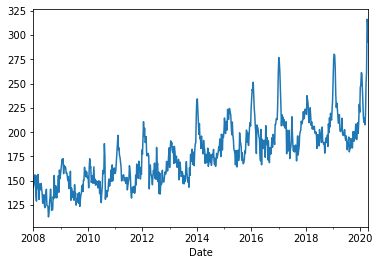

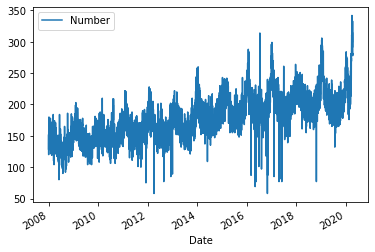

In [31]:
df7avaragae["Number"].plot()
df.plot()

In [13]:
df7avaragae.to_csv("Data/istanbul7dayaverage.csv")

replace FirstName = "Matt" if ID==103
replace LastName =  "Jones" if ID==103
# append 's' to 'age' if it's greater than 1
df.animal = df.animal + ", " + df.type + ", " + \
    df.age.astype(str) + " year" + np.where(df.age > 1, 's', '')

In [3]: df
Out[3]:
                 animal     type  age
-------------------------------------
0   dog, hound, 5 years    hound    5
1  cat, ragdoll, 1 year  ragdoll    1

-------
col         = 'consumption_energy'
conditions  = [ df2[col] >= 400, (df2[col] < 400) & (df2[col]> 200), df2[col] <= 200 ]
choices     = [ "high", 'medium', 'low' ]

df2["energy_class"] = np.select(conditions, choices, default=np.nan)

In [14]:
populationlisttobeinserted=[]

df[df.index.year == 2008]

,Number
Date,
2008-01-01,129
2008-01-02,152
2008-01-03,120
2008-01-04,157
2008-01-05,128
...,...
2008-12-27,154
2008-12-28,127
2008-12-29,161


In [15]:
col         = 'datetime'
def populationmaker(df):
    conditions  = [ df.index.year == 2008,
                   df.index.year == 2009,df.index.year == 2010,df.index.year == 2011,
    df.index.year == 2012,df.index.year == 2013,df.index.year == 2014,df.index.year == 2015,df.index.year == 2016,
                  df.index.year == 2017,df.index.year == 2018,df.index.year == 2019,df.index.year == 2020]
    choices     = choices=[12697164,#8
    12915158,#9
    13255685,#10
    13624240,#11
    13854740,#12
    14160467,#13
    14377018,#14
    14657434,#15
    14804116,#16
    15029231,#17
    15067724,#18
    15519267,#19
    15713258#20         

    ]
    return np.select(conditions, choices, default=np.nan)

In [16]:
df7avaragae["population"] = populationmaker(df7avaragae)

In [17]:
df7avaragae["density"]=(df7avaragae["Number"]/df7avaragae["population"])*1E5

In [18]:
dfyearly=df.resample('6M').mean()

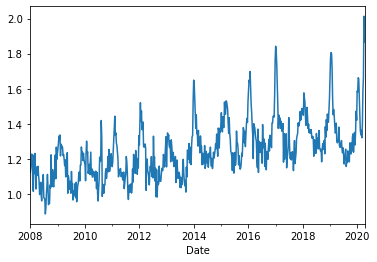

In [19]:
df7avaragae["density"].plot()

In [20]:
df7avaragae

,Number,population,density
Date,,,
2008-01-01,142.857143,12697164.0,1.125111
2008-01-08,145.714286,12697164.0,1.147613
2008-01-15,152.142857,12697164.0,1.198243
2008-01-22,156.000000,12697164.0,1.228621
2008-01-29,150.714286,12697164.0,1.186992
...,...,...,...
2020-03-17,249.428571,15713258.0,1.587377
2020-03-24,261.571429,15713258.0,1.664654
2020-03-31,316.285714,15713258.0,2.012859


In [21]:
!pip install -i https://test.pypi.org/simple/ MFDFA

Looking in indexes: https://test.pypi.org/simple/


In [22]:
from MFDFA import MFDFA
from MFDFA import fgn

In [23]:
lag = np.logspace(0.7, 4, 30).astype(int)

In [24]:
lag

array([    5,     6,     8,    10,    14,    18,    24,    31,    40,
          52,    68,    89,   116,   151,   196,   255,   331,   431,
         560,   727,   945,  1229,  1597,  2076,  2697,  3506,  4556,
        5921,  7694, 10000])

In [25]:
q = 2

# The order of the polynomial fitting
order = 1

# Obtain the (MF)DFA as
lag, dfa = MFDFA(df["density"].to_numpy(), lag = lag, q = q, order = order)

KeyError: 'density'

In [ ]:
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')

# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
np.polyfit(np.log(lag[:15]), np.log(dfa[:15]),1)[0]


In [ ]:

count_data = df["Number"].to_numpy()
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of deaths per day ")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

In [ ]:
df.to_csv("data/istanbuldeath1.csv",header=True)

take 7 day average

n = 2

# Cast your dates as timestamps.
test['Date'] = pd.to_datetime(test.Date)

# Create a daily index spanning the range of the original index.
idx = pd.date_range(test.Date.min(), test.Date.max(), freq='D')

# Pivot by Dates and Users.
df = test.pivot(index='Date', values='Value', columns='User').reindex(idx)
>>> df.head(3)
User        John  Mike
2016-04-01     2   1.0
2016-04-02     3   1.0
2016-04-03   NaN   4.5

# Apply a rolling mean on the above dataframe and reset the index.
df2 = (pd.rolling_mean(df.shift(), n, min_periods=1)
       .reset_index()
       .drop_duplicates())

# For Pandas 0.18.0+
df2 = (df.shift().rolling(window=n, min_periods=1).mean()
       .reset_index()
       .drop_duplicates())

# Melt the result back into the original form.
df3 = (pd.melt(df2, id_vars='Date', value_name='Value')
       .sort_values(['Date', 'User'])
       .reset_index(drop=True))
>>> df3.head()
        Date  User  Value
0 2016-04-01  John    NaN
1 2016-04-01  Mike    NaN
2 2016-04-02  John    2.0
3 2016-04-02  Mike    1.0
4 2016-04-03  John    2.5

# Merge the results back into the original dataframe.
>>> test.merge(df3, on=['Date', 'User'], how='left', 
               suffixes=['', '_Average_past_{0}_days'.format(n)])

        Date  User  Value  Value_Average_past_2_days
0 2016-04-01  Mike    1.0                        NaN
1 2016-04-01  John    2.0                        NaN
2 2016-04-02  Mike    1.0                       1.00
3 2016-04-02  John    3.0                       2.00
4 2016-04-03  Mike    4.5                       1.00
5 2016-04-04  Mike    1.0                       2.75
6 2016-04-05  Mike    2.0                       2.75
7 2016-04-06  Mike    3.0                       1.50
8 2016-04-06  John    6.0                        NaN
-------------------------------------------------------------
# Summary #
n = 2
test['Date'] = pd.to_datetime(test.Date)
idx = pd.date_range(test.Date.min(), test.Date.max(), freq='D')
df = test.pivot(index='Date', values='Value', columns='User').reindex(idx)
df2 = (pd.rolling_mean(df.shift(), n, min_periods=1)
       .reset_index()
       .drop_duplicates())
df3 = (pd.melt(df2, id_vars='Date', value_name='Value')
       .sort_values(['Date', 'User'])
       .reset_index(drop=True))
test.merge(df3, on=['Date', 'User'], how='left', 
           suffixes=['', '_Average_past_{0}_days'.format(n)])

In [ ]:
df.resample('2D').sum()

In [ ]:
! pwd